## Example : total GDP to GDP per capita

In [1]:
import pandas as pd

df = pd.read_csv('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas/data/test_pwt.csv', index_col=0)
df

,country isocode,year,POP,XRAT,tcgdp,cc,cg
country,,,,,,,
Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


We can select particular rows using standard Python array slicing notation

In [2]:
df[2:5] #기본적으로 Index기준으로 슬라이싱이 된다.

,country isocode,year,POP,XRAT,tcgdp,cc,cg
country,,,,,,,
India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954


To select columns, we can pass a list containing the names of the desired columns represented as strings

In [3]:
df[['country', 'tcgdp']] #column은 이름을 기준으로 슬라이싱할 수 있다.

KeyError: "['country'] not in index"

In [ ]:
df.iloc[2:5, 0:4] #iloc은 숫자로 slicing이 가능하다

To select rows and columns using a mixture of integers and labels, the loc attribute can be used in a similar way

In [ ]:
df.loc[['India','Israel'],['year','cc']] #loc은 기존의 인덱싱과는 다른 방식으로, 이름을 기반으로 slicing이 가능하다. 
#현재 loc에서 숫자는 입력이 되지 않는다.

Let’s imagine that we’re only interested in population and total GDP (tcgdp).

One way to strip the data frame df down to only these variables is to overwrite the dataframe using the selection method described above

In [ ]:
df = df['country', 'POP', 'tcgdp']
df

Here the index 0, 1,..., 7 is redundant because we can use the country names as an index.

To do this, we set the index to be the country variable in the dataframe

In [ ]:
df = df.set_index('country')
df

In [ ]:
df.columns = [['population', 'total GDP']]
df

Population is in thousands, let’s revert to single units

In [ ]:
df['population'] = df['population'] * 1e3
df

Next, we’re going to add a column showing real GDP per capita, multiplying by 1,000,000 as we go because total GDP is in millions

In [ ]:
temp = df['total GDP'] * 1e6 / df['population']
df['GDP percap'] = temp
df

One of the nice things about pandas DataFrame and Series objects is that they have methods for plotting and visualization that work through Matplotlib.

For example, we can easily generate a bar plot of GDP per capita

In [ ]:
df['GDP percap'].plot(kind='bar')

At the moment the data frame is ordered alphabetically on the countries—let’s change it to GDP per capita

In [ ]:
df = df.sort_values(by='GDP percap', ascending=False)
df

Plotting as before now yields

In [ ]:
df['GDP percap'].plot(kind='bar')

#### Useful statistical methods :

- Moments
    - Average: .mean()
    - Variance(std): .var(), .std()
    - Skewness: .skew()
    - Kurtosis: .kurtosis()
    - Covariance, Correlation: .cov(), corr()

In [ ]:
df.describe()

In [ ]:
df.mean()

## Additional useful features

- Pandas provides useful functions, expecially for time series data.
- resample
- rolling

In [4]:
df = pd.read_csv('data/test.csv', 
                 index_col=0
                 )
df.head()

,price,volume,buy,sell
2018-11-21 09:00:04.278571,266.200012,1.0,0.0,1.0
2018-11-21 09:00:08.557143,266.200012,1.0,0.0,1.0
2018-11-21 09:00:12.835714,266.250000,21.0,21.0,0.0
2018-11-21 09:00:17.114286,266.299988,1.0,1.0,0.0
2018-11-21 09:00:21.392857,266.350006,2.0,2.0,0.0


t : 분
h : 시간
d : 일
w : 주
    first
    last
    sum

In [5]:
# (1) Sample every 5 minutes
print(df.index)
df.price.resample('5t').ohlc().dropna() #rise error since the index is note datetime.index

Index(['2018-11-21 09:00:04.278571', '2018-11-21 09:00:08.557143',
       '2018-11-21 09:00:12.835714', '2018-11-21 09:00:17.114286',
       '2018-11-21 09:00:21.392857', '2018-11-21 09:00:25.671429',
       '2018-11-21 09:00:29.950000', '2018-11-21 09:00:34.228571',
       '2018-11-21 09:00:38.507143', '2018-11-21 09:00:42.785714',
       ...
       '2018-12-28 15:35:54.900000', '2018-12-28 15:35:25.950000',
       '2018-12-28 15:35:55.900000', '2018-12-28 15:35:16.966667',
       '2018-12-28 15:35:36.933333', '2018-12-28 15:35:56.900000',
       '2018-12-28 15:35:27.950000', '2018-12-28 15:35:57.900000',
       '2018-12-28 15:35:28.950000', '2018-12-28 15:35:58.900000'],
      dtype='object', length=865030)


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [6]:
df.index=pd.to_datetime(df.index)
df.price.resample('5t').ohlc().dropna().head()

,open,high,low,close
2018-11-21 09:00:00,266.200012,266.649994,265.799988,265.850006
2018-11-21 09:05:00,265.950012,266.450012,265.500000,266.250000
2018-11-21 09:10:00,266.100006,266.450012,265.799988,265.850006
2018-11-21 09:15:00,266.149994,266.450012,265.750000,266.399994
2018-11-21 09:20:00,266.399994,266.450012,266.250000,266.350006


In [7]:
df.price.resample('1d').ohlc().dropna().head()

,open,high,low,close
2018-11-21,266.200012,268.799988,265.500000,268.500000
2018-11-22,268.500000,269.399994,267.700012,268.299988
2018-11-23,268.000000,268.850006,265.250000,266.600006
2018-11-26,267.100006,270.399994,266.799988,270.299988
2018-11-27,271.000000,272.750000,269.450012,272.350006


In [8]:
df.price.resample('1d').apply(lambda x : x.max()/x.min()).dropna().head()

2018-11-21    1.012429
2018-11-22    1.006350
2018-11-23    1.013572
2018-11-26    1.013493
2018-11-27    1.012247
Name: price, dtype: float64

In [9]:
def max_min_ratio(x) :
    return x.max()/x.min()

df.price.resample('1d').apply( max_min_ratio).dropna().head()

2018-11-21    1.012429
2018-11-22    1.006350
2018-11-23    1.013572
2018-11-26    1.013493
2018-11-27    1.012247
Name: price, dtype: float64

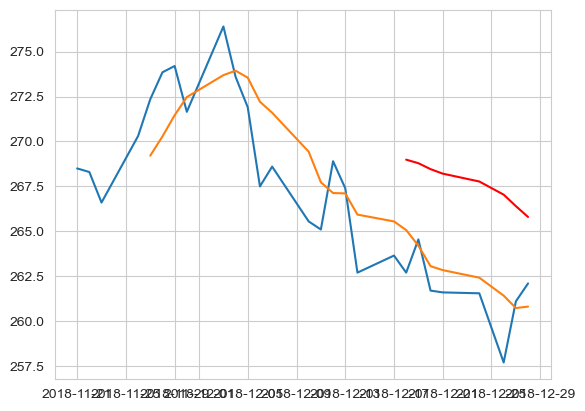

In [10]:
import matplotlib.pyplot as plt

daily = df.price.resample('1d').ohlc().dropna()
plt.plot(daily.close)
plt.plot(daily.close.rolling(5).mean())
plt.plot(daily.close.rolling(20).mean(), 'r')
plt.plot(daily.close.rolling(60).mean(), 'y')